### Lecture 2 : Population Statistics and Random Sampling

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm


### Poisson Distribution

Population Mean: 10.0186, Population Std Dev: 3.1448138323277584
Sample Mean: 10.17, Sample Std Dev: 2.8828978476526013


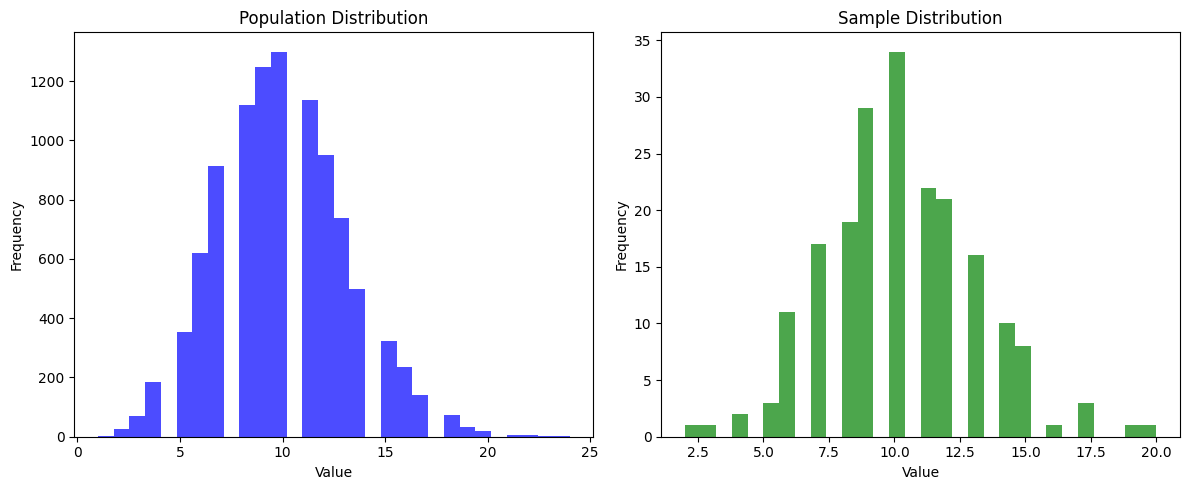

In [66]:
np.random.seed(42)

# Step 1: Generate =1000 random samples from a Poisson distribution with mean of λ
lambda_val = 10 # any positive number
N = 10000
DataPopulation = np.random.poisson(lam=lambda_val, size=N)

# Step 2: Draw random subset of n=30 samples from DataPopulation
n = 200
DataSample = np.random.choice(DataPopulation, size=n, replace=False)

# Step 3: Compute mean and standard deviation of both vectors
PopulationMean = np.mean(DataPopulation)
PopulationStd = np.std(DataPopulation)  
SampleMean = np.mean(DataSample)
SampleStd = np.std(DataSample)

# Step 4: Print the results
print(f"Population Mean: {PopulationMean}, Population Std Dev: {PopulationStd}")
print(f"Sample Mean: {SampleMean}, Sample Std Dev: {SampleStd}")
# Step 5: Plot histograms of both vectors
plt.figure(figsize=(12, 5)) 
plt.subplot(1, 2, 1)
plt.hist(DataPopulation, bins=30, color='blue', alpha=0.7)
plt.title('Population Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(DataSample, bins=30, color='green', alpha=0.7)
plt.title('Sample Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



take sample mean -> assume that it is a mean value of the posson distribution -> generate the best fit posson distribution for the sample mean -> plot that against the population  

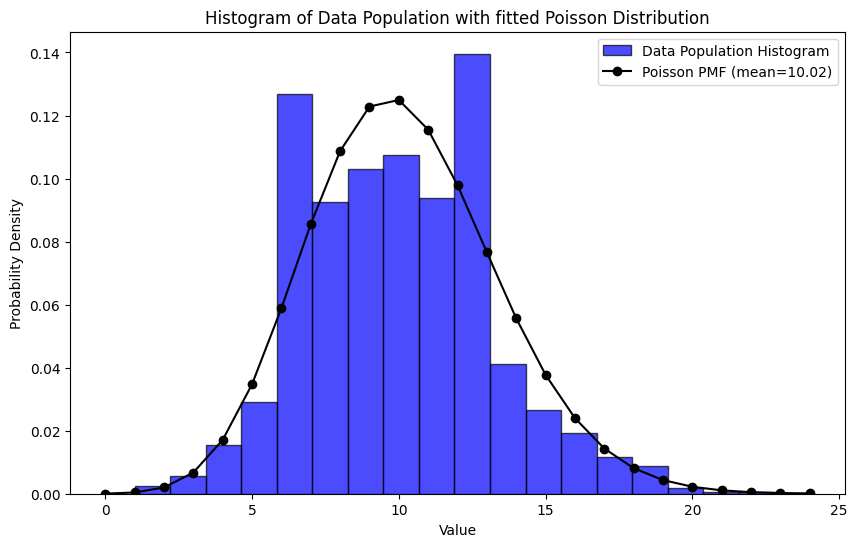

In [67]:
from scipy.stats import poisson

# Generate a hoistogram of the DataPopulation
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(DataPopulation, density=True, bins=19, color='blue', edgecolor='black', alpha=0.7, label='Data Population Histogram')

# Plot the poisson distribution that best fits the sample mean 
x = np.arange(0, bins[-1]+1)
pmf_values = poisson.pmf(x, mu=SampleMean)
plt.plot(x, pmf_values, 'k-', marker = 'o', label=f'Poisson PMF (mean={PopulationMean:.2f})')
#PMF is also called Probability Mass Function or Probability Density Function

# Label 
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Data Population with fitted Poisson Distribution')

plt.legend()
plt.show()

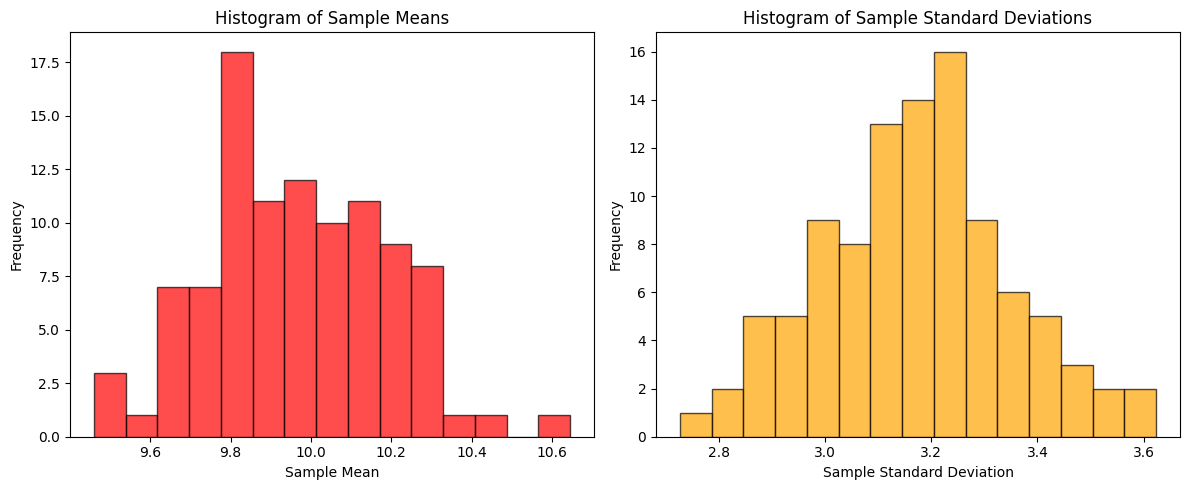

In [74]:
lambda_val = 10 # mean of the Poisson distribution
N = 10000 # size of the population
DataPopulation = np.random.poisson(lam=lambda_val, size=N)
# parameters for sampling
n = 200 # sample size
m = 100 # number of samples to take

# store the sample means and standard deviations
SampleMeans = np.zeros(m) 
SampleStds = np.zeros(m)

# Repeat the sampling process m times
for i in range(m):
    DataSample = np.random.choice(DataPopulation, size=n, replace=False)
    SampleMeans[i] = np.mean(DataSample)
    SampleStds[i] = np.std(DataSample)

# Plot histograms of Sample Means and Sample Standard Deviations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(SampleMeans, bins=15, color='red', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(SampleStds, bins=15, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sample Standard Deviations')
plt.xlabel('Sample Standard Deviation')
plt.ylabel('Frequency')
#plt.grid(True)
plt.tight_layout()
plt.show()

here we can see it is normal distribution
X bar is normal distribution with mean mu

now lets compute that normal 

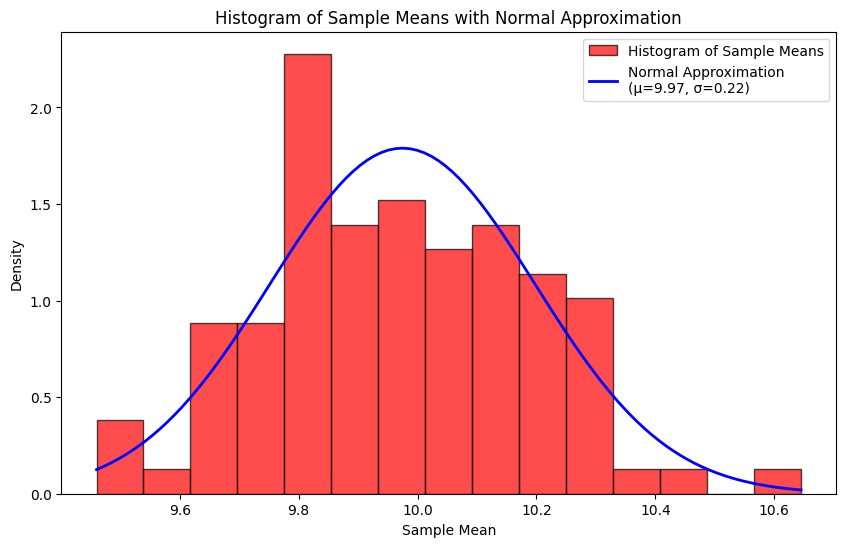

In [75]:
from scipy.stats import norm

# Calculate mean and std 
mean_population = np.mean(DataPopulation)
std_population = np.std(DataPopulation)

# Compute std of the sample means (standard error of the mean)
std_error = std_population / np.sqrt(n)

# Generate normal distribution that approximates the distribution of sample means
x = np.linspace(min(SampleMeans), max(SampleMeans), 100)
normal_approximation = norm.pdf(x, loc=mean_population, scale=std_error)

# Plot histogram of Sample Means with normal approximation
plt.figure(figsize=(10, 6))
plt.hist(SampleMeans, bins=15, density=True, color='red', edgecolor='black', alpha=0.7, label='Histogram of Sample Means')

# Plot nomal distribution approximation on the top of the histogram
plt.plot(x, normal_approximation, 'b-', label=f'Normal Approximation\n(μ={mean_population:.2f}, σ={std_error:.2f})', linewidth=2)

# Labeling
plt.title('Histogram of Sample Means with Normal Approximation')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### Lecture  : Normal approximation to Sample mean

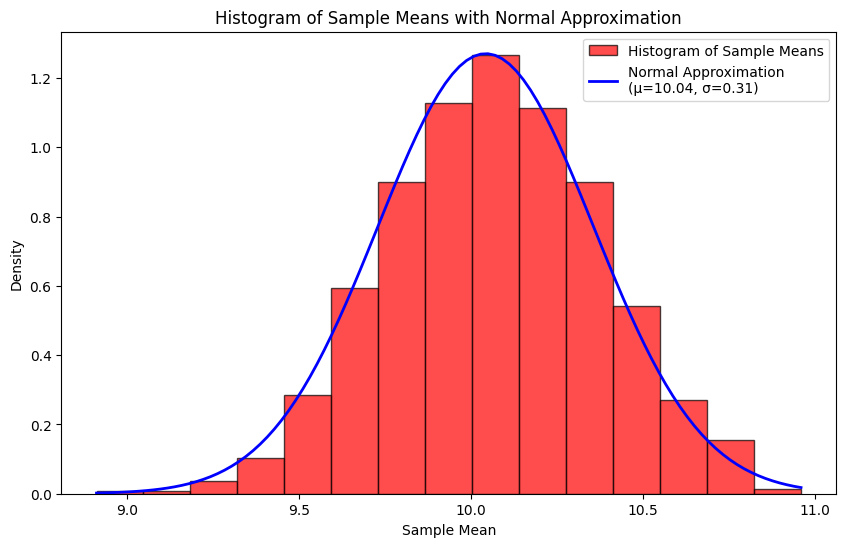

In [20]:
lambda_value = 10 # mean of the Poisson distribution
N = 10000 # size of the population
DataPopulation = np.random.poisson(lam=lambda_value, size=N)

# parameters for sampling
n = 100 # sample size
m = 1000 # number of samples to take

# store the sample means and standard deviations
SampleMeans = np.zeros(m)
SampleStds = np.zeros(m)

# Repeat the sampling process m times
for i in range(m):
    DataSample = np.random.choice(DataPopulation, size=n, replace=False)
    SampleMeans[i] = np.mean(DataSample)
    SampleStds[i] = np.std(DataSample)

# Calculate mean and std of the population
mean_population = np.mean(DataPopulation)
std_population = np.std(DataPopulation)

# compute standard deviation of the sample means (standard error of the mean)
std_error = std_population / np.sqrt(n)

# Generate normal distribution that approximates the distribution of sample means
x = np.linspace(min(SampleMeans), max(SampleMeans), 100)
normal_approximation = norm.pdf(x, loc=mean_population, scale=std_error)

# Plot histogram of Sample Means with normal approximation
plt.figure(figsize=(10, 6))
plt.hist(SampleMeans, bins=15, density=True, color='red', edgecolor='black', alpha=0.7, label='Histogram of Sample Means')

# Plot normal distribution approximation on top of the histogram
plt.plot(x, normal_approximation, 'b-', label=f'Normal Approximation\n(μ={mean_population:.2f}, σ={std_error:.2f})', linewidth=2)

# Labeling
plt.title('Histogram of Sample Means with Normal Approximation')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()